In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nhập Input

In [2]:
# nhập hàm f(x, y)
def f(x, y):
    return np.array([x*y[0]/2])

# vị trí đầu
a = 0
# vị trí cuối
b = 1
# số mốc
n = 6
# giá trị y0
y0 = np.array([1])
# sai số
eps = 1e-4

Công thức euler hiện:
$$y_{i+1} = y_i + hf(x_i, y_i)$$
Miền ổn định tuyệt đối:
$$|1 + z| < 1, \quad z\in\mathbb{Z}$$

In [3]:
# tính bằng euler hiện
def Euler_hien(a, b, y0, n):
    h = (b - a) / (n-1)
    x = np.linspace(a, b, n)
    y = [y0]
    
    for i in range(n - 1):
        y.append(y[i] + h * f(x[i], y[i]))

    return x, np.array(y)

Công thức euler ẩn:
$$y_{i+1} = y_i + hf(x_i, y_i)$$
Công thức Euler ẩn cải tiến:
$$
\begin{cases}
y_{i+1}^{(0)} &= y_i + hf(x_i, y_i)\\
y_{i+1}^{(m)} &= y_i + hf(x_{i+1}, y_{i+1}^{(m - 1)}), \quad(y_{i+1}^{(m)} - y_{i+1}^{(m - 1)} > eps)
\end{cases}
$$
Miền ổn định tuyệt đối:
$$|1 - z| > 1, \quad z\in\mathbb{Z}$$


In [4]:
# tính bằng euler ẩn
def Euler_an(a, b, y0, n, eps):
    h = (b - a) / (n-1)
    x = np.linspace(a, b, n)
    y = [y0]
    for i in range(n - 1):
        y.append(y[i] + h * f(x[i], y[i]))
        print("------------------")
        print("x = ", x[i + 1], "y = ", y[i + 1])
        yTerm = np.copy(y[i+1] + 1)
        k = 1
        while np.linalg.norm(yTerm - y[i+1]) > eps and k < 1000:
            print("lần lặp thứ ", k)
            k += 1
            yTerm = np.copy(y[i+1])
            y[i+1] = y[i] + h * f(x[i + 1], y[i + 1])
            print("y = ", y[i+1])
        if k > 990:
            print("=====================================")
            print("Số vòng lặp quá lớn !!!")
            print("=====================================")
            return 0, 0
    return x, np.array(y)

Công thức hình thang:
$$y_{i+1} = y_i + \frac{h}{2}[f(x_i, y_i) + f(x_{i+1}, y_{i+1})]$$
Công thức hình thang cải tiến:
$$
\begin{cases}
y_{i+1}^{(0)} &= y_i + hf(x_i, y_i)\\
y_{i+1}^{(m)} &= y_i + \frac{h}{2}[f(x_i, y_i) + f(x_{i+1}, y_{i+1}^{(m-1)})], \quad(y_{i+1}^{(m)} - y_{i+1}^{(m - 1)} > eps)
\end{cases}
$$

In [5]:
# tính bằng công thức hình thang
def hinh_thang(a, b, y0, n, eps):
    h = (b - a) / (n-1)
    x = np.linspace(a, b, n)
    y = [y0]

    for i in range(n - 1):
        y.append(y[i] + h * f(x[i], y[i]))
        print("------------------")
        print("x = ", x[i + 1], "y = ", y[i + 1])
        yTerm = np.copy(y[i+1] + 1)
        k = 1
        while np.linalg.norm(yTerm - y[i+1]) > eps:
            print("lần lặp thứ ", k)
            k += 1
            yTerm = np.copy(y[i+1])
            y[i+1] = y[i] + h/2 * (f(x[i], y[i]) + f(x[i+1], y[i+1]))
            print("y = ", y[i+1])
        
    return x, np.array(y)

In [6]:
# hàm ghép trơn bậc 3
def ghep_tron_bac_3(x, y):
    S = list()
    h = list()
    m = list()
    lamda = list()
    muy = list()
    d = list()
    alpha = list()
    beta = list()
    phi = list()
    theta = list()

    lamda.append(1)
    muy.append(0)
    d.append(0)
    h.append(x[1] - x[0])

    alpha.append(0)
    beta.append(0)

    for i in range(0, len(x) - 2):
        h.append(x[i + 2] - x[i + 1])
        alpha.append(lamda[i] / (-2 - muy[i] * alpha[i]))
        beta.append((beta[i]*muy[i] - d[i])/(-2 - muy[i] * alpha[i]))
        lamda.append(h[i+1]/(h[i] + h[i+1]))
        muy.append(1 - lamda[i+1])
        d.append(6*((y[i+2] - y[i+1])/h[i+1] - (y[i+1] - y[i])/h[i])/(h[i] + h[i+1]))

    alpha.append(lamda[-1]/(-2 - muy[-1]*alpha[-1]))
    beta.append((beta[-1]*muy[-1] - d[-1])/(-2 - muy[-1]*alpha[-2]))

    lamda.append(0)
    muy.append(1)
    d.append(0)

    m.append((muy[-1]*beta[-1] - d[-1])/(-2 - muy[-1]*alpha[-1]))

    for i in range(len(x) - 2, -1, -1):
        m.append(alpha[i+1]*m[-1] + beta[i+1])
        phi.append(y[i+1]/h[i] - m[-2]*h[i]/6)
        theta.append(y[i]/h[i] - m[-1]*h[i]/6)
        s = list()
        s.append((-m[-1] + m[-2])/(6*h[i]))
        s.append((m[-1]*x[i+1] - m[-2]*x[i])/(2*h[i]))
        s.append((-m[-1]*x[i+1]**2 + m[-2]*x[i]**2)/(2*h[i]) + phi[-1] - theta[-1])
        s.append((m[-1]*x[i+1]**3 - m[-2]*x[i]**3)/(6*h[i]) - phi[-1]*x[i] + theta[-1]*x[i+1])
        S.append(np.array(s))
    S.reverse()
    return S

def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

# vẽ đồ thị
def ve_do_thi(x, y, S):
    # plt.plot(x, y, 'ro')
    for i in range(len(S)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S[i], x_0)[1]
        plt.plot(x_0, y_0, 'b')
    plt.show()

def ve_do_thi_2(x, y, S1, S2):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    plt.legend([Y0[0], Y1[0]], ['y[0]', 'y[1]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

def ve_do_thi_3(x, y, S1, S2, S3):
    # plt.plot(x, y, 'ro')
    for i in range(len(S1)):
        x_0 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_0 = hoocne_quatient(S1[i], x_0)[1]
        Y0 = plt.plot(x_0, y_0, 'r')
    for i in range(len(S2)):
        x_1 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_1 = hoocne_quatient(S2[i], x_1)[1]
        Y1 = plt.plot(x_1, y_1, 'g')
    for i in range(len(S3)):
        x_2 = np.linspace(x[i], x[i + 1], int((x[i + 1] - x[i])*1000))
        y_2 = hoocne_quatient(S2[i], x_2)[1]
        Y2 = plt.plot(x_2, y_2, 'b')
    plt.legend([Y0[0], Y1[0], Y2[0]], ['y[0]', 'y[1]', 'y[2]'])
    plt.show()

    plt.plot(y[:, 0], y[:, 1], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[1]')
    plt.show()

    plt.plot(y[:, 0], y[:, 2], 'y')
    plt.xlabel('y[0]')
    plt.ylabel('y[2]')
    plt.show()

    plt.plot(y[:, 1], y[:, 2], 'y')
    plt.xlabel('y[1]')
    plt.ylabel('y[2]')

In [7]:
bac = y0.shape[0]

kết quả euler hiện

Euler hiện:
[[ 3.          1.         -0.5       ]
 [ 3.1         0.75       -0.3       ]
 [ 3.2         0.57       -0.165     ]
 [ 3.3         0.4395     -0.075     ]
 [ 3.4         0.3441     -0.01605   ]
 [ 3.5         0.273675    0.02157   ]
 [ 3.6         0.221097    0.0446235 ]
 [ 3.7         0.18133995  0.0578085 ]
 [ 3.8         0.15085281  0.06438079]
 [ 3.9         0.12712033  0.06658992]
 [ 4.          0.10835525  0.06598397]
 [ 4.1         0.0932826   0.0636227 ]
 [ 4.2         0.08098835  0.06022642]
 [ 4.3         0.07081332  0.05627997]
 [ 4.4         0.06227865  0.05210531]
 [ 4.5         0.05503345  0.04791211]
 [ 4.6         0.04881797  0.04383303]
 [ 4.7         0.04343768  0.03994823]
 [ 4.8         0.03874497  0.03630235]
 [ 4.9         0.03462621  0.03291638]
 [ 5.          0.03099261  0.02979572]
 [ 5.1         0.02777366  0.02693584]
 [ 5.2         0.02491251  0.02432604]
 [ 5.3         0.02236261  0.02195208]
 [ 5.4         0.0200853   0.01979792]
 [ 5.5       

C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1082698960.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


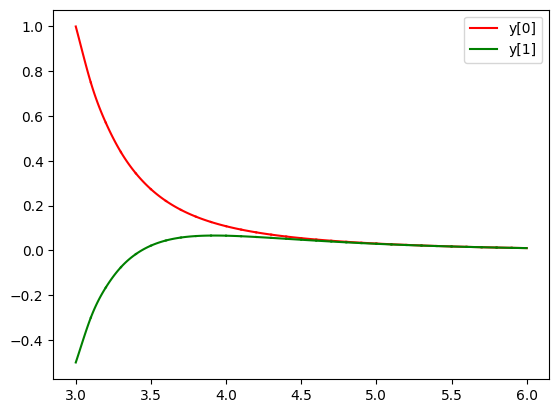

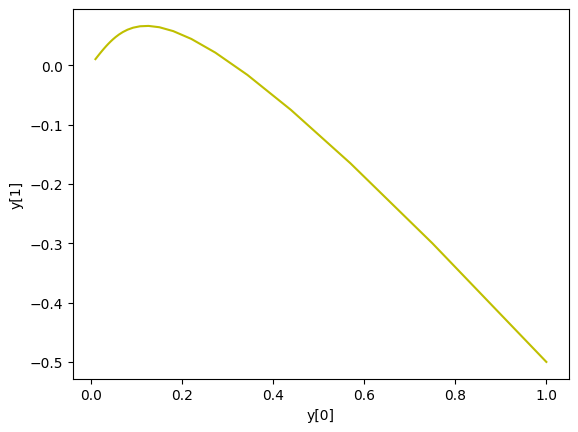

In [8]:
print("Euler hiện:")
print("=====================================")
x, y = Euler_hien(a, b, y0, n)
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Kết quả euler ẩn

Euler ẩn:
------------------
x =  3.1 y =  [ 0.75 -0.3 ]
lần lặp thứ  1
y =  [ 0.82  -0.365]
lần lặp thứ  2
y =  [ 0.7995 -0.345 ]
lần lặp thứ  3
y =  [ 0.8056  -0.35105]
lần lặp thứ  4
y =  [ 0.803775 -0.34923 ]
lần lặp thứ  5
y =  [ 0.804322  -0.3497765]
lần lặp thứ  6
y =  [ 0.80415795 -0.3496125 ]
lần lặp thứ  7
y =  [ 0.80420716 -0.3496617 ]
------------------
x =  3.2 y =  [ 0.60839956 -0.19930865]
lần lặp thứ  1
y =  [ 0.66259638 -0.24896002]
lần lặp thứ  2
y =  [ 0.64679188 -0.23361006]
lần lặp thứ  3
y =  [ 0.65148778 -0.2382605 ]
lần lặp thứ  4
y =  [ 0.65008355 -0.23686083]
lần lặp thứ  5
y =  [ 0.65050437 -0.23728118]
lần lặp thứ  6
y =  [ 0.65037817 -0.23715503]
lần lặp thứ  7
y =  [ 0.65041602 -0.23719288]
------------------
x =  3.3 y =  [ 0.49661353 -0.1247127 ]
lần lặp thứ  1
y =  [ 0.53862205 -0.16258899]
lần lặp thứ  2
y =  [ 0.52643272 -0.15081288]
lần lặp thứ  3
y =  [ 0.53004819 -0.15438703]
lần lặp thứ  4
y =  [ 0.52896768 -0.15331066]
lần lặp thứ  5
y =  [ 0.529

C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1082698960.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


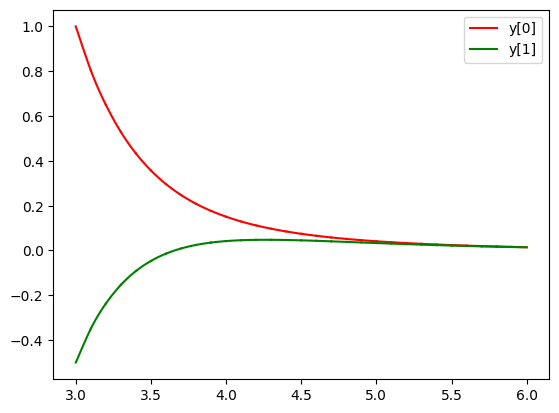

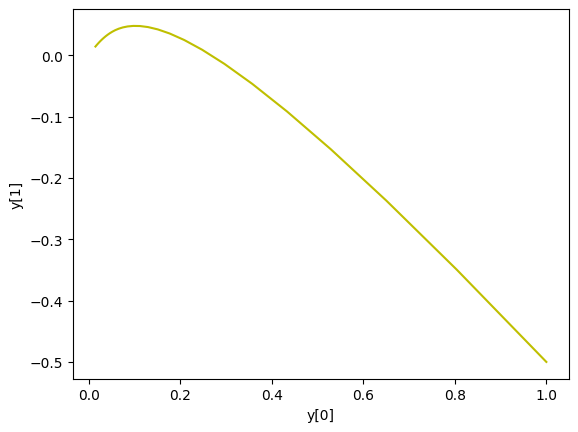

In [9]:
print("Euler ẩn:")
x, y = Euler_an(a, b, y0, n, eps)
print("=====================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Kết quả hình thang

Hình thang:
------------------
x =  3.1 y =  [ 0.75 -0.3 ]
lần lặp thứ  1
y =  [ 0.785  -0.3325]
lần lặp thứ  2
y =  [ 0.779875 -0.3275  ]
lần lặp thứ  3
y =  [ 0.7806375  -0.32825625]
lần lặp thứ  4
y =  [ 0.78052344 -0.3281425 ]
lần lặp thứ  5
y =  [ 0.78054053 -0.32815958]
------------------
x =  3.2 y =  [ 0.59161647 -0.18447361]
lần lặp thứ  1
y =  [ 0.61769317 -0.20828841]
lần lặp thứ  2
y =  [ 0.61389476 -0.20460309]
lần lặp thứ  3
y =  [ 0.61445887 -0.20516155]
lần lặp thứ  4
y =  [ 0.61437454 -0.2050775 ]
lần lặp thứ  5
y =  [ 0.61438717 -0.20509012]
------------------
x =  3.3 y =  [ 0.47100072 -0.10263338]
lần lặp thứ  1
y =  [ 0.49046221 -0.12004837]
lần lặp thứ  2
y =  [ 0.48764531 -0.1173338 ]
lần lặp thứ  3
y =  [ 0.48806273 -0.1177461 ]
lần lặp thứ  4
y =  [ 0.48800037 -0.117684  ]
------------------
x =  3.4 y =  [ 0.3786319  -0.04534716]
lần lặp thứ  1
y =  [ 0.39318559 -0.05804927]
lần lặp thứ  2
y =  [ 0.39109511 -0.05605138]
lần lặp thứ  3
y =  [ 0.39140405 -0.0563

C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1082698960.py:61: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b = np.array(y[:-1])


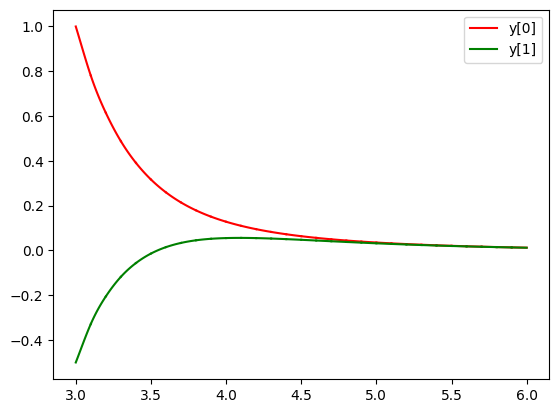

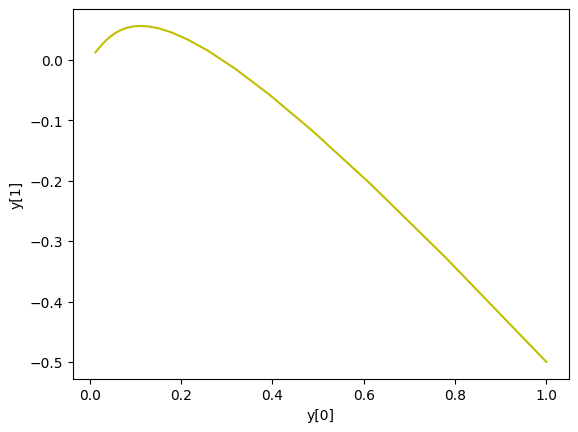

In [10]:
print("Hình thang:")
x, y = hinh_thang(a, b, y0, n, eps)
print("=====================================")
if bac == 1:
    print(np.concatenate((x, y[:, 0])).reshape(2, n).T)
    print("=====================================")
    S = ghep_tron_bac_3(x, y[:, 0])
    ve_do_thi(x, y, S)
elif bac == 2:
    print(y[: : 2, 0])
    print(y[: : 2, 1])
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1])))).reshape(3, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    ve_do_thi_2(x, y, S1, S2)
elif bac == 3:
    print(np.concatenate((x, np.concatenate((y[:, 0], y[:, 1], y[:, 2])))).reshape(4, n).T)
    S1 = ghep_tron_bac_3(x, y[:, 0])
    S2 = ghep_tron_bac_3(x, y[:, 1])
    S3 = ghep_tron_bac_3(x, y[:, 2])
    ve_do_thi_3(x, y, S1, S2, S3)
# print("=====================================")
# while True:
#     x_0 = float(input("Nhập x_0: "))
#     location = 0
#     for i in range(x.shape[0] - 1):
#         if x[i] <= x_0 and x_0 <= x[i + 1]:
#             location = i
#             break
#     print("y({}) = ".format(x_0), hoocne_quatient(S[location], x_0)[1])

Thuật toán:\
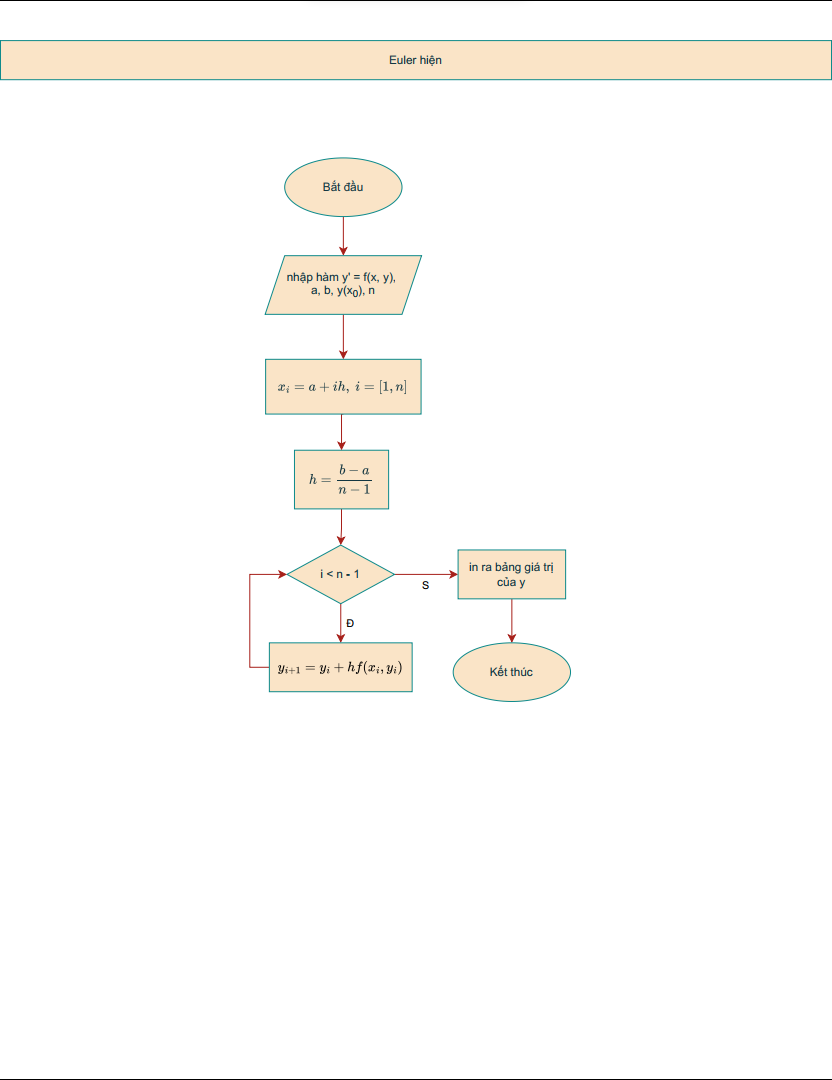\
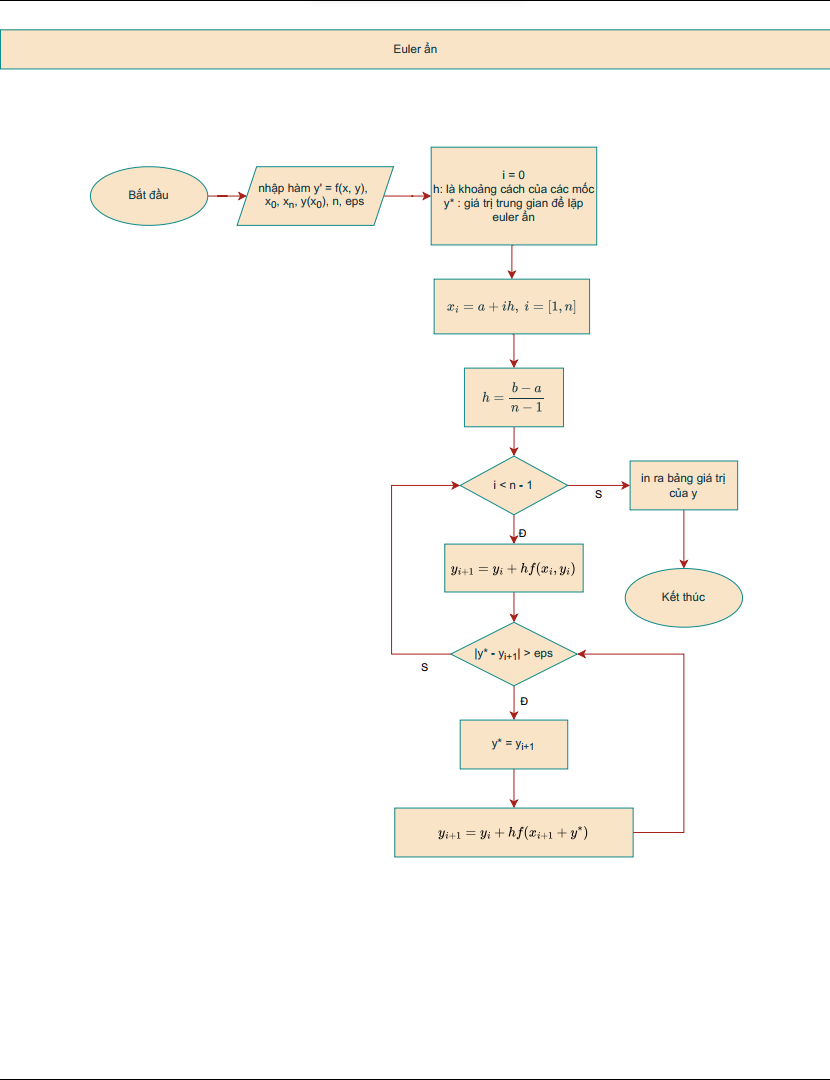\
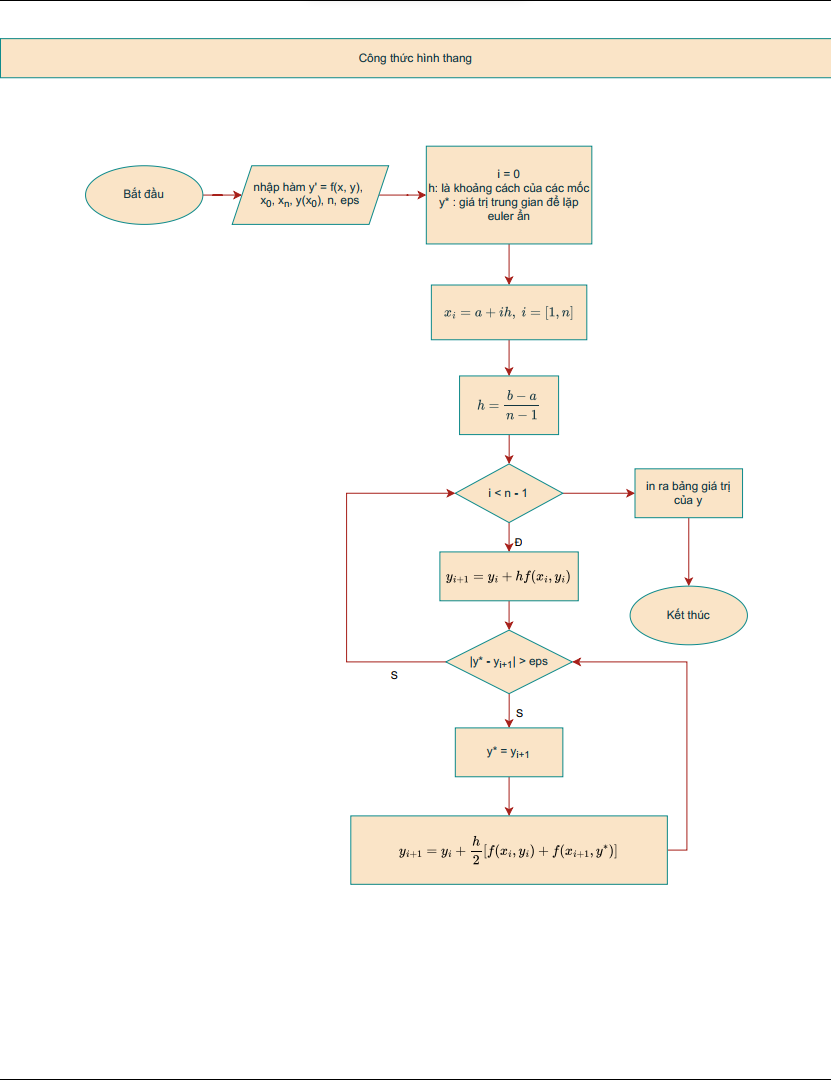